In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [63]:
#file = pd.read_csv(r"https://raw.githubusercontent.com/logpai/loghub/master/HealthApp/HealthApp_2k.log_structured.csv")

In [8]:
file = pd.read_csv(r"D:\WORKOOPOLIS\NATWEST\HealthApp_2k.log_structured.csv")

In [9]:
file

LineId                   Time                 Component       Pid  \
0          1  20171223-22:15:29:606                  Step_LSC  30002312   
1          2  20171223-22:15:29:615                  Step_LSC  30002312   
2          3  20171223-22:15:29:633  Step_StandReportReceiver  30002312   
3          4  20171223-22:15:29:635                  Step_LSC  30002312   
4          5  20171223-22:15:29:635     Step_StandStepCounter  30002312   
...      ...                    ...                       ...       ...   
1995    1996   20171224-0:58:53:985                  Step_LSC  30002312   
1996    1997    20171224-0:59:7:581                  Step_LSC  30002312   
1997    1998     20171224-1:0:0:794                  Step_LSC  30002312   
1998    1999     20171224-1:1:0:935                  Step_LSC  30002312   
1999    2000    20171224-1:2:35:789                  Step_LSC  30002312   

                                                Content EventId  \
0                               onStandStepChanged 3579     E42   
1                         onExtend:1514038530000 14 0 4     E39   
2     onReceive action: android.intent.action.SCREEN_ON     E41   
3     processHandleBroadcastAction action:android.in...     E43   
4                                     flush sensor data     E12   
...                                                 ...     ...   
1995  processHandleBroadcastAction action:android.in...     E44   
1996  processHandleBroadcastAction action:android.in...     E44   
1997  processHandleBroadcastAction action:android.in...     E44   
1998  processHandleBroadcastAction action:android.in...     E44   
1999  processHandleBroadcastAction action:android.in...     E44   

                                          EventTemplate  
0                                onStandStepChanged <*>  
1                              onExtend:<*> <*> <*> <*>  
2     onReceive action: android.intent.action.SCREEN_ON  
3     processHandleBroadcastAction action:android.in...  
4                                     flush sensor data  
...                                                 ...  
1995  processHandleBroadcastAction action:android.in...  
1996  processHandleBroadcastAction action:android.in...  
1997  processHandleBroadcastAction action:android.in...  
1998  processHandleBroadcastAction action:android.in...  
1999  processHandleBroadcastAction action:android.in...  

[2000 rows x 7 columns]

# Preprocessing

In [11]:
file['Time1'] = file['Time'].str.split('-').str.get(0)
file['Time1'] = pd.to_datetime(file['Time1'])
file['year'] = file['Time1'].dt.year
file['month'] = file['Time1'].dt.month
file['day'] = file['Time1'].dt.day
#file['week'] = file['Time1'].dt.weekofyear

file1 = file.drop(['Time'], axis=1)

In [12]:
file['Time2'] = file['Time'].str.split('-').str.get(1)
file['hour'] = file['Time2'].str.split(':').str.get(0)
file['minutes'] = file['Time2'].str.split(':').str.get(1)
file['seconds'] = file['Time2'].str.split(':').str.get(2)
file['Time2'] = pd.to_datetime(file['Time2'], format='%H:%M:%S:%f', errors='coerce')
file['hour_minute'] = file['Time2'].dt.strftime('%H:%M')

In [13]:
file1 = file.drop(['Time1','Time2'], axis=1)

In [14]:
file1['Component'].value_counts()

Component
Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: count, dtype: int64

In [15]:
list(file1['Content'])

['onStandStepChanged 3579',
 'onExtend:1514038530000 14 0 4',
 'onReceive action: android.intent.action.SCREEN_ON',
 'processHandleBroadcastAction action:android.intent.action.SCREEN_ON',
 'flush sensor data',
 ' getTodayTotalDetailSteps = 1514038440000##6993##548365##8661##12266##27164404',
 'setTodayTotalDetailSteps=1514038440000##7007##548365##8661##12361##27173954',
 'onStandStepChanged 3579',
 'calculateCaloriesWithCache totalCalories=126775',
 'calculateAltitudeWithCache totalAltitude=240',
 'REPORT : 7007 5002 150089 240',
 'onExtend:1514038530000 0 0 4',
 'onStandStepChanged 3579',
 'onStandStepChanged 3580',
 'onExtend:1514038530000 1 0 4',
 ' getTodayTotalDetailSteps = 1514038440000##7007##548365##8661##12361##27173954',
 'setTodayTotalDetailSteps=1514038440000##7008##548365##8661##12456##27174269',
 'calculateCaloriesWithCache totalCalories=126797',
 'calculateAltitudeWithCache totalAltitude=240',
 'REPORT : 7008 5003 150111 240',
 'onStandStepChanged 3581',
 'onExtend:15140

In [16]:
file1['Con'] =file1['Content'].str.split('=').str.get(0)
file1['Con_log'] =file1['Content'].str.split('=').str.get(1)
file1['mix'] = file1['Content'].str.split('total').str.get(1)

file2 = file1[~file1['mix'].isnull()]

In [17]:
file2['mix1'] = file2['mix'].str.split('=').str.get(0)
file2['value'] = file2['mix'].str.split('=').str.get(1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18384\317096185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['mix1'] = file2['mix'].str.split('=').str.get(0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18384\317096185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['value'] = file2['mix'].str.split('=').str.get(1)


In [18]:
file3 = file2[file2['mix1']=='Calories']

In [19]:
file4 = file3.drop(['Content','Con','mix','EventTemplate','Con_log'], axis=1)

In [20]:
file5 = file4.reset_index().drop(['index'], axis=1)

In [21]:
print(file5[['hour', 'minutes', 'seconds']].isnull().any())

hour       False
minutes    False
seconds    False
dtype: bool


In [23]:
file5['value'] = pd.to_numeric(file5['value'])
file5['year'] = pd.to_numeric(file5['year'])
file5['month'] = pd.to_numeric(file5['month'])
file5['day'] = pd.to_numeric(file5['day'])
#file5['week'] = pd.to_numeric(file5['week'])
file5['hour'] = pd.to_numeric(file5['hour'])
file5['seconds'] = pd.to_numeric(file5['seconds'])
file5['minutes'] = pd.to_numeric(file5['minutes'])

In [24]:
file5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LineId       241 non-null    int64 
 1   Time         241 non-null    object
 2   Component    241 non-null    object
 3   Pid          241 non-null    int64 
 4   EventId      241 non-null    object
 5   year         241 non-null    int32 
 6   month        241 non-null    int32 
 7   day          241 non-null    int32 
 8   hour         241 non-null    int64 
 9   minutes      241 non-null    int64 
 10  seconds      241 non-null    int64 
 11  hour_minute  241 non-null    object
 12  mix1         241 non-null    object
 13  value        241 non-null    int64 
dtypes: int32(3), int64(6), object(5)
memory usage: 23.7+ KB


In [25]:
file6 = file5.drop(['Pid','LineId','Time','EventId'], axis=1)

In [26]:
file6

Component  year  month  day  hour  minutes  seconds hour_minute  \
0    Step_ExtSDM  2017     12   23    22       15       29       22:15   
1    Step_ExtSDM  2017     12   23    22       15       29       22:15   
2    Step_ExtSDM  2017     12   23    22       15       30       22:15   
3    Step_ExtSDM  2017     12   23    22       15       31       22:15   
4    Step_ExtSDM  2017     12   23    22       15       32       22:15   
..           ...   ...    ...  ...   ...      ...      ...         ...   
236  Step_ExtSDM  2017     12   24     0       11       57       00:11   
237  Step_ExtSDM  2017     12   24     0       15       53       00:15   
238  Step_ExtSDM  2017     12   24     0       25       16       00:25   
239  Step_ExtSDM  2017     12   24     0       25       17       00:25   
240  Step_ExtSDM  2017     12   24     0       28       25       00:28   

         mix1   value  
0    Calories  126775  
1    Calories  126797  
2    Calories  126818  
3    Calories  126861  
4    Calories  126882  
..        ...     ...  
236  Calories       0  
237  Calories       0  
238  Calories       0  
239  Calories       0  
240  Calories       0  

[241 rows x 10 columns]

In [27]:
file6['cal_Burned'] = file6['value'].diff()

In [28]:
file6['cal_Burned'].loc[217] = 0

C:\Users\Dell\AppData\Local\Temp\ipykernel_18384\3208568987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file6['cal_Burned'].loc[217] = 0


In [29]:
file6['cumulative_cal_Burned'] = file6['cal_Burned'].cumsum()

In [30]:
file6

Component  year  month  day  hour  minutes  seconds hour_minute  \
0    Step_ExtSDM  2017     12   23    22       15       29       22:15   
1    Step_ExtSDM  2017     12   23    22       15       29       22:15   
2    Step_ExtSDM  2017     12   23    22       15       30       22:15   
3    Step_ExtSDM  2017     12   23    22       15       31       22:15   
4    Step_ExtSDM  2017     12   23    22       15       32       22:15   
..           ...   ...    ...  ...   ...      ...      ...         ...   
236  Step_ExtSDM  2017     12   24     0       11       57       00:11   
237  Step_ExtSDM  2017     12   24     0       15       53       00:15   
238  Step_ExtSDM  2017     12   24     0       25       16       00:25   
239  Step_ExtSDM  2017     12   24     0       25       17       00:25   
240  Step_ExtSDM  2017     12   24     0       28       25       00:28   

         mix1   value  cal_Burned  cumulative_cal_Burned  
0    Calories  126775         NaN                    NaN  
1    Calories  126797        22.0                   22.0  
2    Calories  126818        21.0                   43.0  
3    Calories  126861        43.0                   86.0  
4    Calories  126882        21.0                  107.0  
..        ...     ...         ...                    ...  
236  Calories       0         0.0                 4433.0  
237  Calories       0         0.0                 4433.0  
238  Calories       0         0.0                 4433.0  
239  Calories       0         0.0                 4433.0  
240  Calories       0         0.0                 4433.0  

[241 rows x 12 columns]

# TOTAL Calories Burned in mean time 

In [31]:
time_str1 = '22:15'
time_str2 = '00:28'

datetime1 = datetime.strptime(time_str1, '%H:%M')
datetime2 = datetime.strptime(time_str2, '%H:%M')

In [32]:
time_difference = datetime2 - datetime1

In [33]:
time_difference

datetime.timedelta(days=-1, seconds=7980)

# 7980 seconds  or  2 hours,13 minutes

# cumulative_cal_Burned vs hour_minute

In [34]:
df = pd.DataFrame()
df['index'] = file6['hour_minute']
df['cumulative_cal_Burned'] = file6['cumulative_cal_Burned']
df = df.set_index('index')

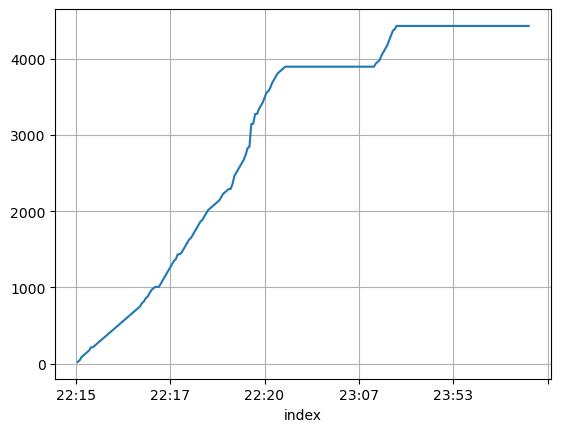

In [35]:
df['cumulative_cal_Burned'].plot(kind='line')
plt.grid(True)

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=file6['cumulative_cal_Burned'],
    y=file6['hour_minute'],
    mode='markers',
    marker=dict(size=8),
))


fig.update_layout(
    title='Scatter Plot of Cumulative Calories Burned',
    xaxis=dict(title='Cumulative Calories Burned'),
    yaxis=dict(title='Hour Minute'),
    
)


fig.show()

In [37]:
# as per above graph, the person has burned around 1371 calories which lap was around 2:00 mintues
# in second lap, after break person has burned 921 calories and lap was around 2.00


# cal_Burned vs hour_minute

In [38]:
df1 = pd.DataFrame()
df1['index'] = file6['hour_minute']
df1['cal_Burned'] = file6['cal_Burned']
df1 = df1.set_index('index')

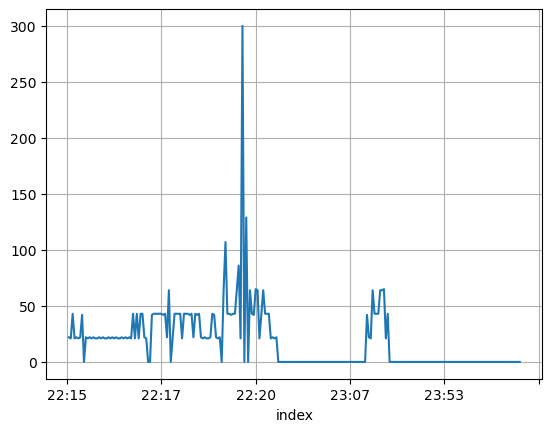

In [40]:
df1['cal_Burned'].plot(kind='line')
plt.grid(True)

# value

<Axes: >

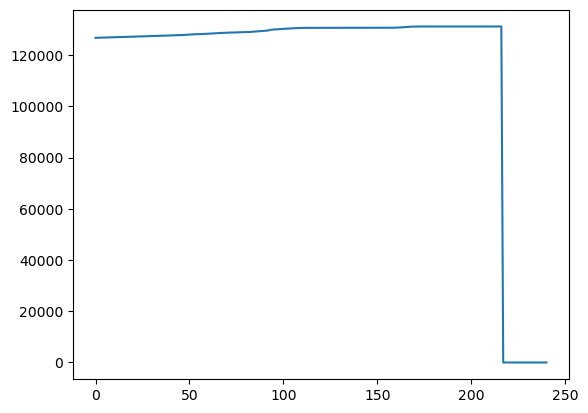

In [41]:
file6['value'].plot()

# in different time span cal burned

In [42]:
file6

Component  year  month  day  hour  minutes  seconds hour_minute  \
0    Step_ExtSDM  2017     12   23    22       15       29       22:15   
1    Step_ExtSDM  2017     12   23    22       15       29       22:15   
2    Step_ExtSDM  2017     12   23    22       15       30       22:15   
3    Step_ExtSDM  2017     12   23    22       15       31       22:15   
4    Step_ExtSDM  2017     12   23    22       15       32       22:15   
..           ...   ...    ...  ...   ...      ...      ...         ...   
236  Step_ExtSDM  2017     12   24     0       11       57       00:11   
237  Step_ExtSDM  2017     12   24     0       15       53       00:15   
238  Step_ExtSDM  2017     12   24     0       25       16       00:25   
239  Step_ExtSDM  2017     12   24     0       25       17       00:25   
240  Step_ExtSDM  2017     12   24     0       28       25       00:28   

         mix1   value  cal_Burned  cumulative_cal_Burned  
0    Calories  126775         NaN                    NaN  
1    Calories  126797        22.0                   22.0  
2    Calories  126818        21.0                   43.0  
3    Calories  126861        43.0                   86.0  
4    Calories  126882        21.0                  107.0  
..        ...     ...         ...                    ...  
236  Calories       0         0.0                 4433.0  
237  Calories       0         0.0                 4433.0  
238  Calories       0         0.0                 4433.0  
239  Calories       0         0.0                 4433.0  
240  Calories       0         0.0                 4433.0  

[241 rows x 12 columns]

In [47]:
fd = pd.DataFrame()
fd

Empty DataFrame
Columns: []
Index: []

In [48]:
fd['hour'] = file6['hour']
fd['minutes'] = file6['minutes']
fd['seconds'] = file6['seconds']
fd['cal_Burned'] = file6['cal_Burned']
fd['cumulative_cal_Burned'] = file6['cumulative_cal_Burned']
fd

hour  minutes  seconds  cal_Burned  cumulative_cal_Burned
0      22       15       29         NaN                    NaN
1      22       15       29        22.0                   22.0
2      22       15       30        21.0                   43.0
3      22       15       31        43.0                   86.0
4      22       15       32        21.0                  107.0
..    ...      ...      ...         ...                    ...
236     0       11       57         0.0                 4433.0
237     0       15       53         0.0                 4433.0
238     0       25       16         0.0                 4433.0
239     0       25       17         0.0                 4433.0
240     0       28       25         0.0                 4433.0

[241 rows x 5 columns]

In [49]:
fd['hourtime'] = fd['hour'].astype(str) + ':' + fd['minutes'].astype(str) + ':' + fd['minutes'].astype(str)

In [50]:
first_lap = fd[(fd['minutes'] <= 17) & (fd['cumulative_cal_Burned'] <= 1371)]

In [53]:
first_lap.head()

hour  minutes  seconds  cal_Burned  cumulative_cal_Burned  hourtime
1    22       15       29        22.0                   22.0  22:15:15
2    22       15       30        21.0                   43.0  22:15:15
3    22       15       31        43.0                   86.0  22:15:15
4    22       15       32        21.0                  107.0  22:15:15
5    22       15       32        22.0                  129.0  22:15:15

In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=first_lap['cumulative_cal_Burned'],
    y=first_lap['hourtime'],
    mode='markers',
    marker=dict(size=8),
))


fig.update_layout(
    title='Scatter Plot of Cumulative Calories Burned',
    xaxis=dict(title='Cumulative Calories Burned'),
    yaxis=dict(title='Hour Minute'),
    
)


fig.show()

 1. During the first lap person burned around 1371 calories inwhich in the first minute person has burned around 
    1007 calories in the next minute during the first lap he has burned only 364 calories.The rate of calorie burn in 
    the second minute of first lap reduced by 63.85 percent. 
    

In [55]:
second_lap = fd[(fd['cumulative_cal_Burned'] <= 2356) & (fd['cumulative_cal_Burned'] > 1371)]

In [57]:
second_lap

hour  minutes  seconds  cal_Burned  cumulative_cal_Burned  hourtime
54    22       17       25        64.0                 1435.0  22:17:17
55    22       17       28         0.0                 1435.0  22:17:17
56    22       17       45        21.0                 1456.0  22:17:17
57    22       17       45        43.0                 1499.0  22:17:17
58    22       17       46        43.0                 1542.0  22:17:17
59    22       17       46        43.0                 1585.0  22:17:17
60    22       17       47        43.0                 1628.0  22:17:17
61    22       17       47        21.0                 1649.0  22:17:17
62    22       17       48        43.0                 1692.0  22:17:17
63    22       17       48        43.0                 1735.0  22:17:17
64    22       17       49        43.0                 1778.0  22:17:17
65    22       17       49        42.0                 1820.0  22:17:17
66    22       17       50        43.0                 1863.0  22:17:17
67    22       17       50        22.0                 1885.0  22:17:17
68    22       17       51        43.0                 1928.0  22:17:17
69    22       17       51        42.0                 1970.0  22:17:17
70    22       17       52        43.0                 2013.0  22:17:17
71    22       17       53        22.0                 2035.0  22:17:17
72    22       17       54        21.0                 2056.0  22:17:17
73    22       17       55        22.0                 2078.0  22:17:17
74    22       17       55        21.0                 2099.0  22:17:17
75    22       17       56        21.0                 2120.0  22:17:17
76    22       17       57        22.0                 2142.0  22:17:17
77    22       17       58        43.0                 2185.0  22:17:17
78    22       18        0        42.0                 2227.0  22:18:18
79    22       18        1        22.0                 2249.0  22:18:18
80    22       18        2        21.0                 2270.0  22:18:18
81    22       18        5        22.0                 2292.0  22:18:18
82    22       18        6         0.0                 2292.0  22:18:18
83    22       19        8        64.0                 2356.0  22:19:19

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=second_lap['cumulative_cal_Burned'],
    y=second_lap['hourtime'],
    mode='markers',
    marker=dict(size=8),
))


fig.update_layout(
    title='Scatter Plot of Cumulative Calories Burned',
    xaxis=dict(title='Cumulative Calories Burned'),
    yaxis=dict(title='Hour Minute'),
    
)


fig.show()

In [ ]:
 1. During the second lap person burned around 921 calories in which in the first minute person has burned around 
    750 calories in the next minute during the second lap he has burned only 171 calories.The rate of calorie burn in 
    the second minute of second lap reduced by 77.2 percent. 

In [59]:
third_lap = fd[fd['cumulative_cal_Burned'] > 2356]

In [60]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=third_lap['cumulative_cal_Burned'],
    y=third_lap['hourtime'],
    mode='markers',
    marker=dict(size=8),
))


fig.update_layout(
    title='Scatter Plot of Cumulative Calories Burned',
    xaxis=dict(title='Cumulative Calories Burned'),
    yaxis=dict(title='Hour Minute'),
    
)


fig.show()

In [ ]:
1. During the third lap person burned around 1970 calories in the first minute person has burned around 
    1435 calories in the second minute during the third lap he has burned only 535 calories.The rate of calorie burn in 
    the second minute of third lap reduced by 62.71 percent. 

# Over all Report

Title: "Comprehensive Fitness Analysis: Unveiling Caloric Expenditure Patterns Over 2 Hours and 13 Minutes"

In the span of 7980 seconds, equivalent to 2 hours and 13 minutes, a detailed examination of the fitness analytics reveals intriguing insights. According to the graphical representation, the individual expended approximately 1371 calories in a lap lasting around 2:00 minutes.

Notably, in the second lap, following a brief break, the caloric burn reached 921 calories within a 2-minute span. The data suggests fluctuations in caloric expenditure, potentially attributed to variations in running pace—highlighted prominently between 22:17 and 20:19, indicating a period of heightened caloric burn, possibly indicative of vigorous running. Conversely, instances of zero caloric burn suggest moments of halted running.

A closer look at the second lap unveils a significant reduction in calorie burn rate, dropping by 77.2 percent from 750 calories in the first minute to 171 calories in the subsequent minute. Similarly, in the third lap, despite an overall caloric expenditure of 1970 calories, there was a 62.71 percent reduction in the calorie burn rate between the first and second minutes, from 1435 to 535 calories.

This comprehensive analysis not only sheds light on the overall caloric burn but also dissects minute-by-minute trends, offering valuable insights into the individual's varying running intensities and potential periods of rest.


